In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

plt.style.use("seaborn-darkgrid")

C:\Users\Desktop\AppData\Local\Temp\ipykernel_1740\455590385.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-darkgrid")


In [2]:
x = 2 * np.random.rand(100,1)
y = 4 + 3 * x + np.random.randn(100,1)

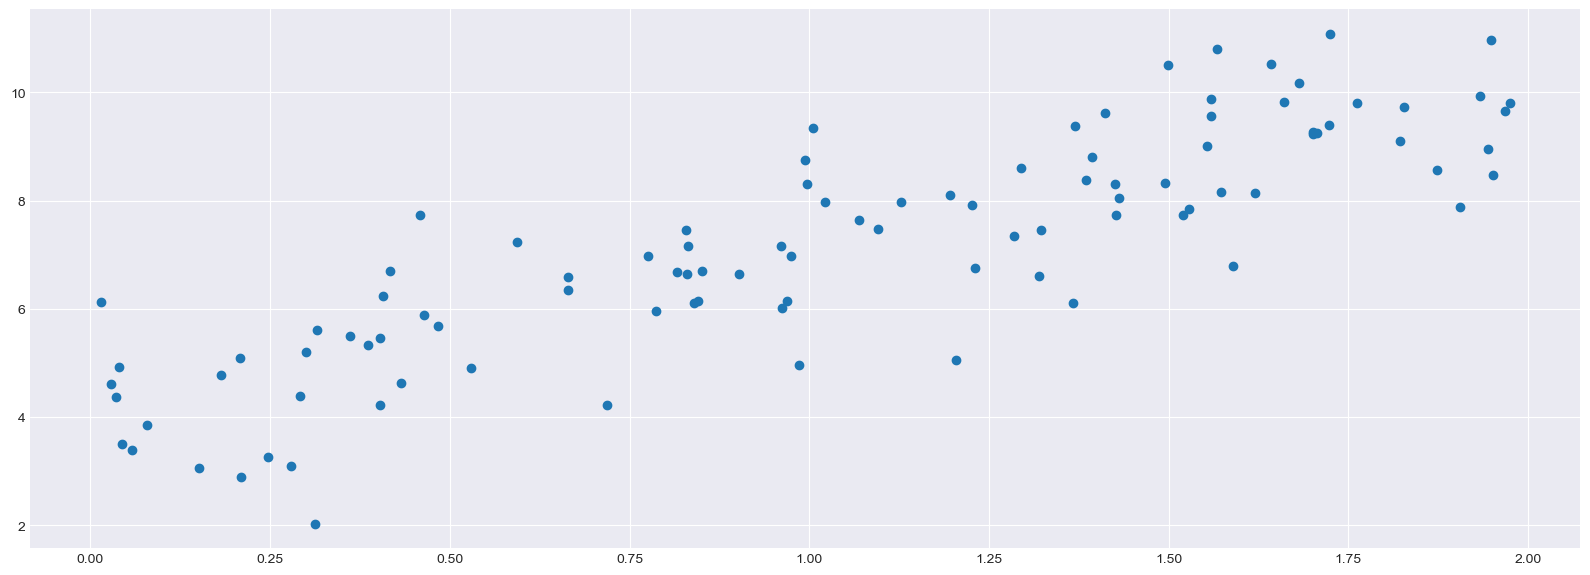

In [3]:
fig, ax = plt.subplots(figsize = (20,7))
plt.scatter(x,y)

# Regressão Linear 

In [4]:
x_b = np.c_[np.ones((100,1)),x] # concatena os valores de x com outro vetor de mesmo tamanho 100x1. visualize x e x_b

In [5]:
theta = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)

In [6]:
theta # a intencao era encontrar os termos independentes 4 e 3 da equalcao y

array([[3.9890459 ],
       [3.05208138]])

In [7]:
y_hat = theta[0] + x * theta[1] 

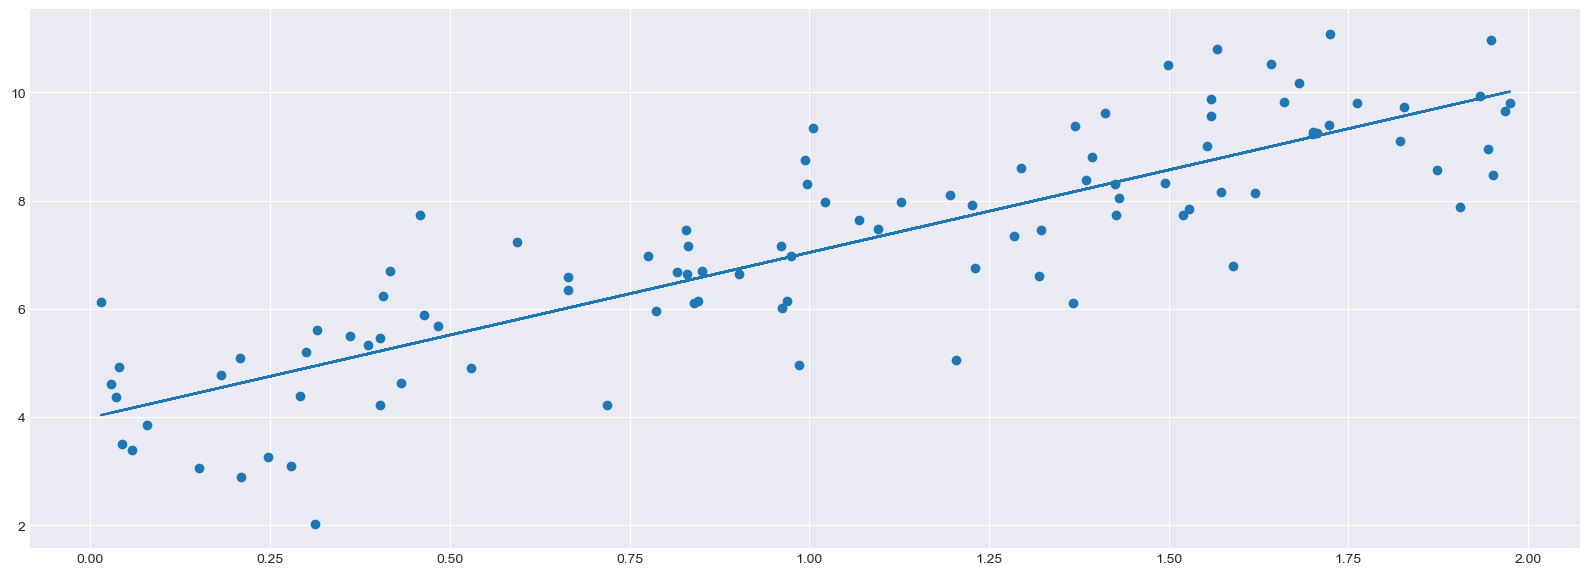

In [8]:
fig,ax = plt.subplots(figsize = (20,7))
plt.plot(x,y_hat)
plt.scatter(x,y)

# Gradient Descent

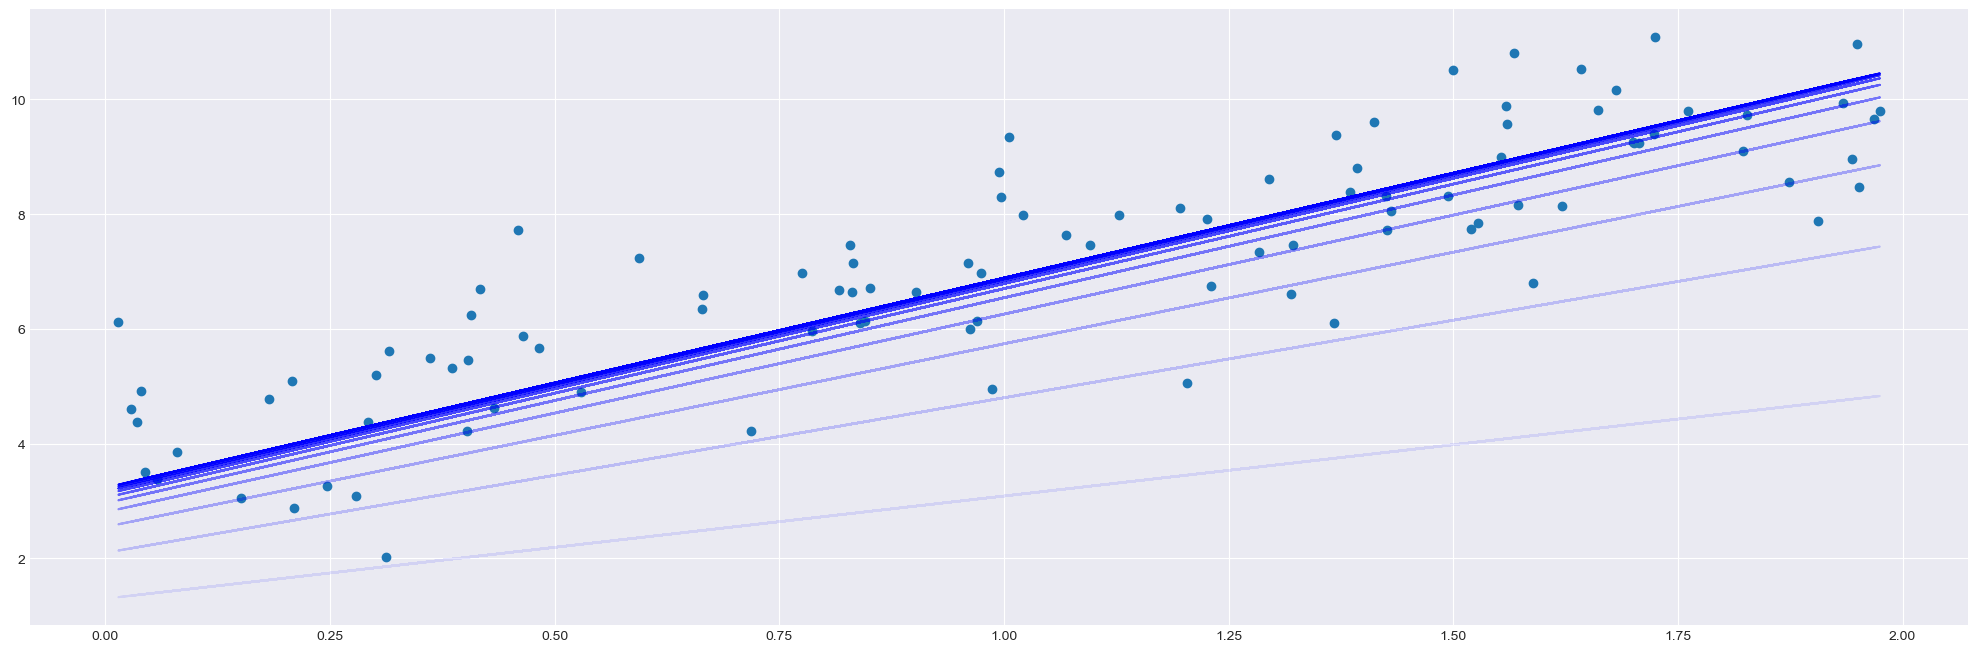

In [9]:
eta = 0.1 # alterar os valores de eta para entender como se comporta a taxa de aprendizado 
n_interations = 10
m = 100

theta = np.random.randn(2,1)

fig,ax = plt.subplots(figsize = (25,8))
plt.scatter(x,y)

for interaction in range(n_interations):
    gradients = 2/m * x_b.T.dot(x_b.dot(theta) - y)
    theta = theta - eta * gradients
    y_hat = theta[0] + x *theta[1]
    
    ax.plot(x, y_hat, alpha = 0.1 + interaction/n_interations, color = "blue")


# Regressão Polinomial 

In [10]:
m = 100
x = 6 * np.random.rand(m,1) - 3
y = 0.5 * x**2 + x + 2  * np.random.randn(m,1) 

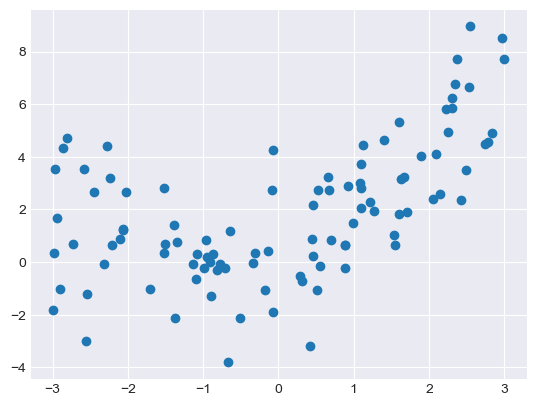

In [11]:
plt.scatter(x,y)

In [12]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)

x_poly = poly_features.fit_transform(x)

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
lin_reg = LinearRegression()
lin_reg.fit(x_poly,y)

LinearRegression()

In [15]:
lin_reg.intercept_

array([0.39805321])

In [16]:
lin_reg.coef_

array([[0.86626203, 0.46989848]])

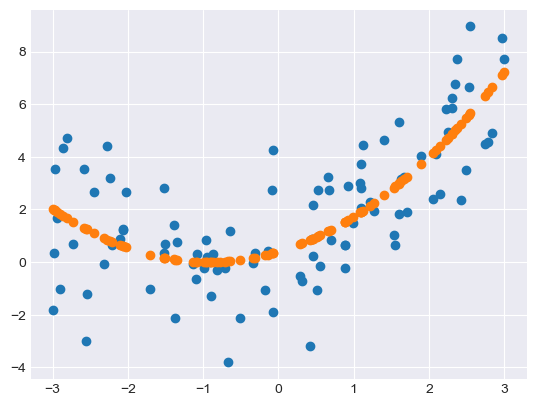

In [17]:
plt.scatter(x,y)
plt.scatter(x, lin_reg.predict(x_poly))

# underfit e overfit

(-4.0, 4.0)

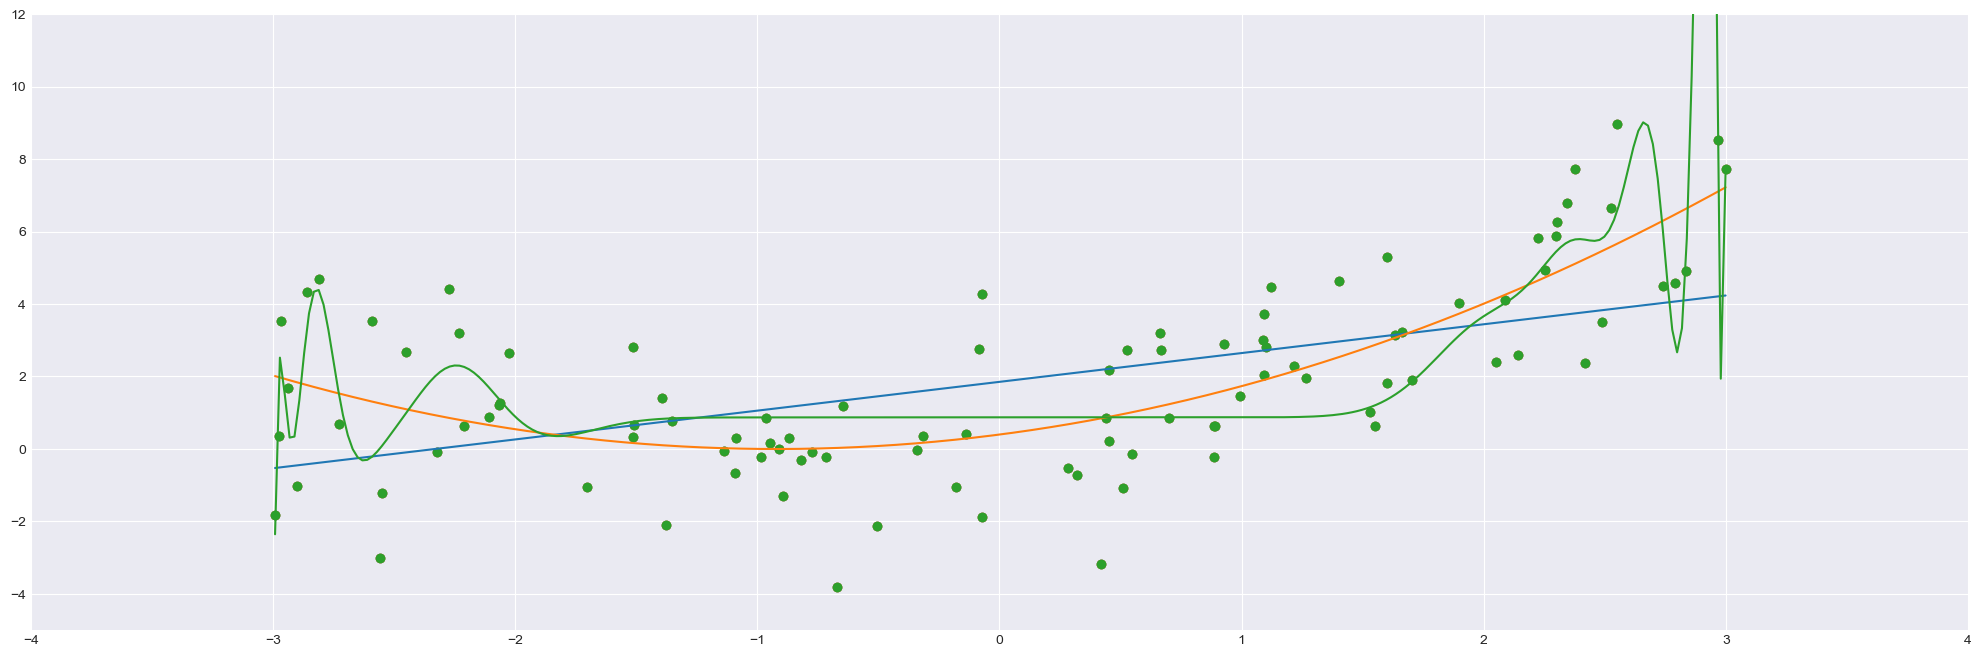

In [18]:
fig, ax = plt.subplots(figsize=(25, 8))
for degree in [1, 2, 40]:
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    x_poly = poly_features.fit_transform(x)
    x_seq = np.linspace(x.min(), x.max(), 300).reshape(-1,1)
    
    lin_reg = LinearRegression()
    lin_reg.fit(x_poly, y)  
    
    plt.scatter(x, y)
    x_seq_transf = poly_features.fit_transform(x_seq)
    plt.plot(x_seq, lin_reg.predict(x_seq_transf), label=degree)
ax.set_ylim([-5, 12])
ax.set_xlim([-4, 4])


# Ridge Regression

In [19]:
from sklearn.linear_model import Ridge

In [20]:
m = 100
x = np.random.rand(m, 1) - 3
y = np.random.randn(m, 1)

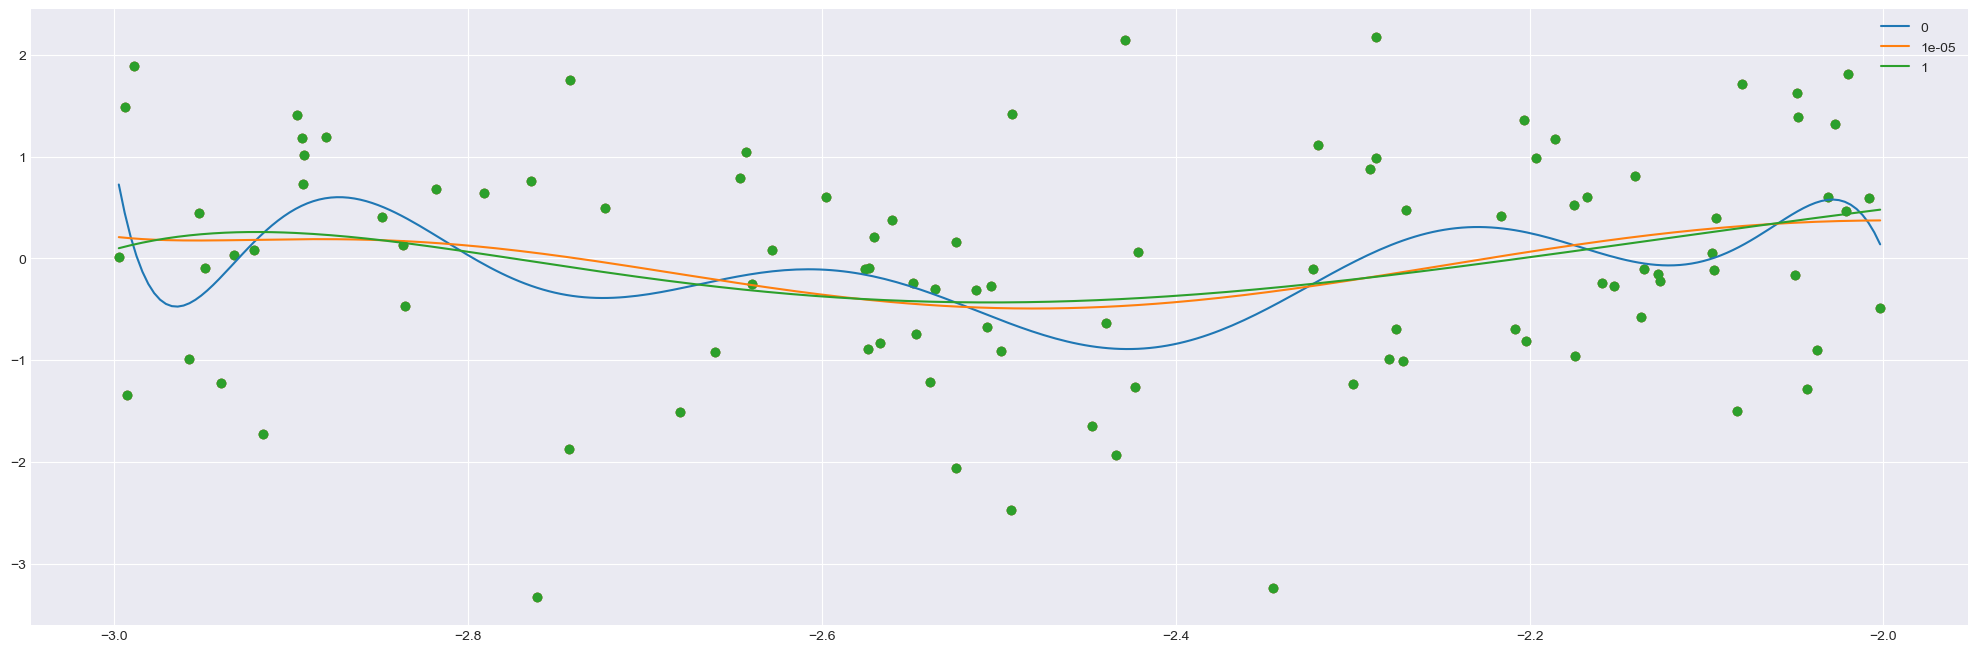

In [21]:
fig, ax = plt.subplots(figsize=(25, 8))
for alpha in [0, 1e-5, 1]:
    poly_features = PolynomialFeatures(degree=10, include_bias=False)
    x_poly = poly_features.fit_transform(x)
    x_seq = np.linspace(x.min(), x.max(), 300).reshape(-1,1)
    
    ridge_reg = Ridge(alpha=alpha, solver="cholesky")
    ridge_reg.fit(x_poly, y)  
    
    plt.scatter(x, y)
    x_seq_transf = poly_features.fit_transform(x_seq)
    plt.plot(x_seq, ridge_reg.predict(x_seq_transf), label=alpha)
ax.legend()

# Logistic regression

In [22]:
from sklearn import datasets

In [23]:
iris = datasets.load_iris()

In [24]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [25]:
iris["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [26]:
iris["target"]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [27]:
x = iris["data"][:,3:]
y = (iris["target"] == 2).astype(int)

In [28]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

log_reg.fit(x,y)

LogisticRegression()

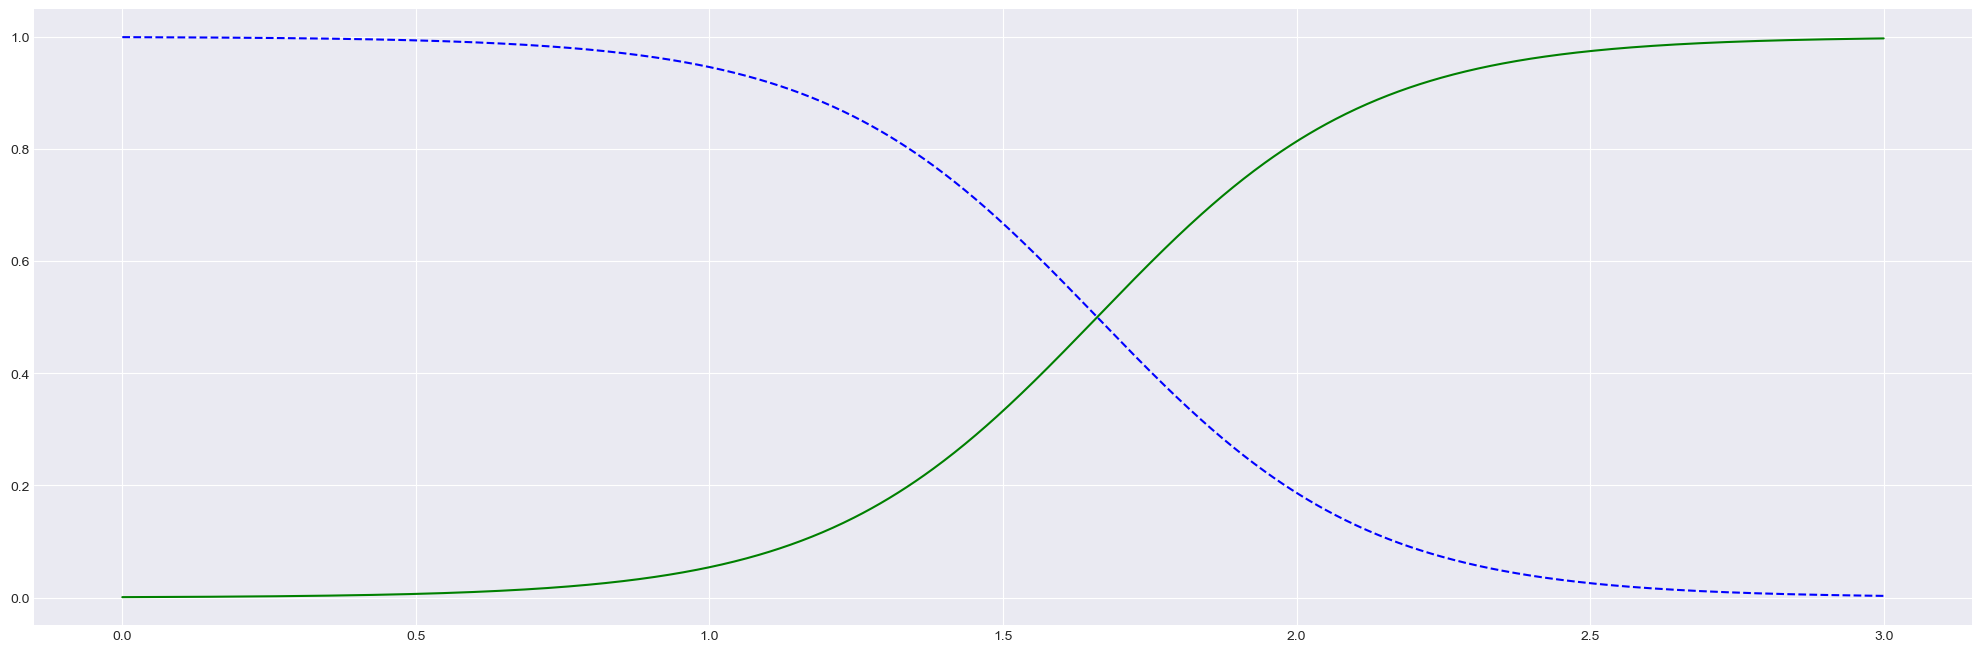

In [29]:
fig, ax = plt.subplots(figsize=(25, 8))
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris virginica")


# Softmax Regression

In [30]:
x = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)
softmax_reg.fit(x, y)

LogisticRegression(C=10, multi_class='multinomial')

In [31]:
0.5 * np.log(1/0.5) + 0.5 * np.log(1/0.5)

0.6931471805599453

In [32]:
softmax_reg.predict([[5, 2]])
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

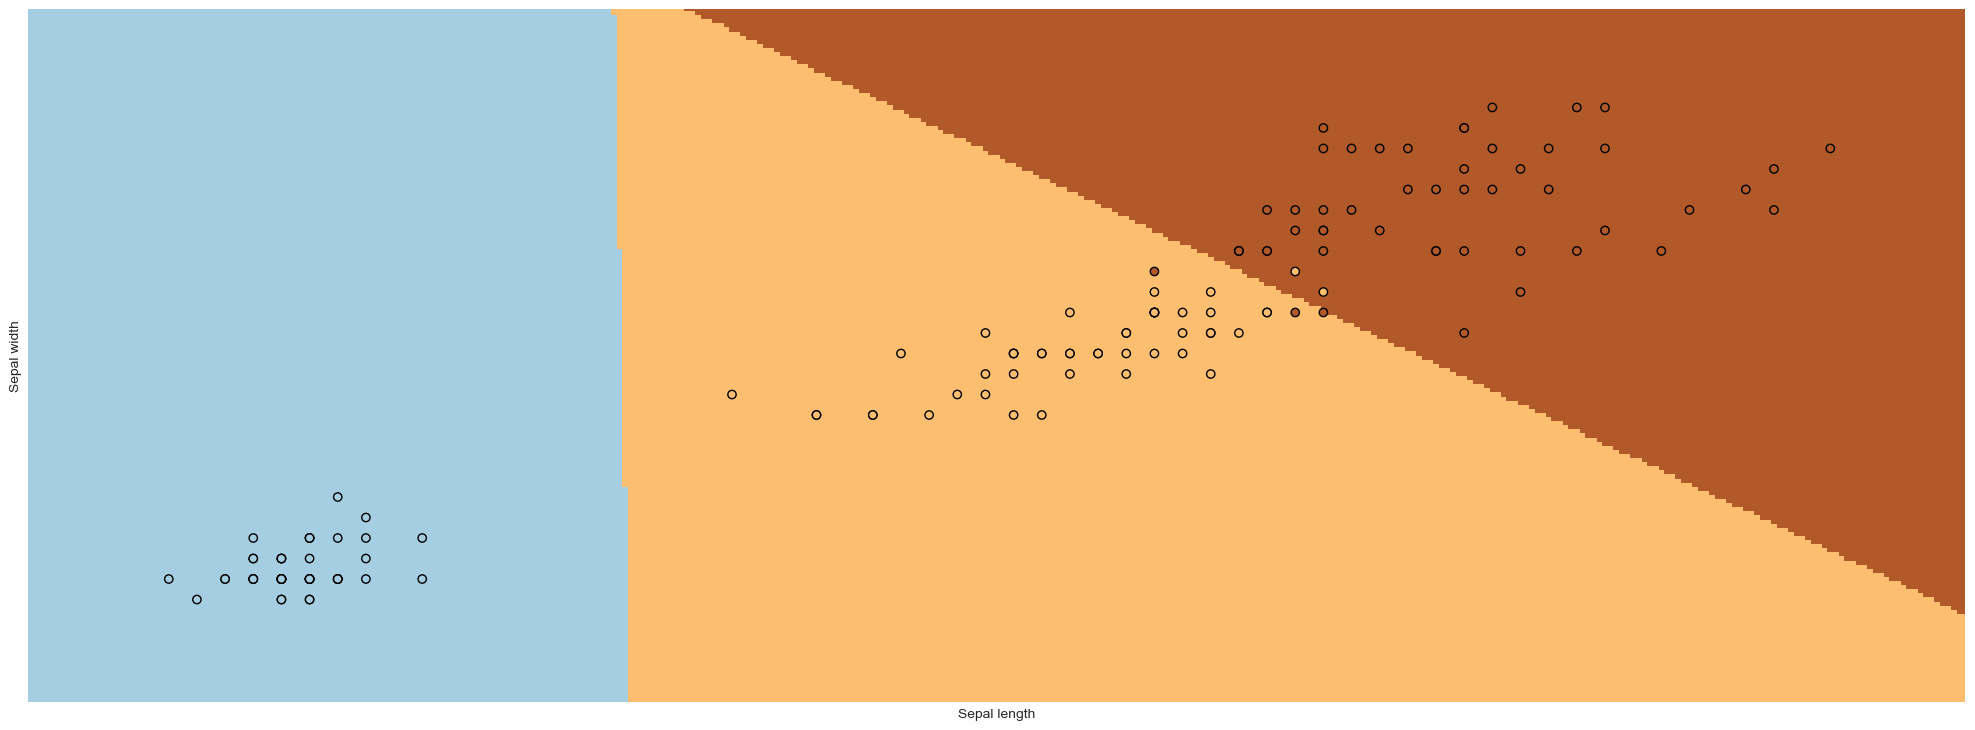

In [33]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = x[:, 0].min() - 0.5, x[:, 0].max() + 0.5
y_min, y_max = x[:, 1].min() - 0.5, x[:, 1].max() + 0.5
h = 0.02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = softmax_reg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(25, 9))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(x[:, 0], x[:, 1], c=y, edgecolors="k", cmap=plt.cm.Paired)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()